In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import sympy as sym
import os.path as path
import wget

In [74]:
file = 'Punto4.csv'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Parabolico.csv'
if not path.exists(file):
    Path_ = wget.download(url,file)
else:
    print('--File found---')
    Path_ = file

100% [....................................................................................] 73 / 73

In [75]:
Data = pd.read_csv(Path_,sep=',')

In [76]:
Data

,X,Y
0,1.4,0.400795
1,3.5,0.594128
2,5.6,0.298028


In [78]:
#X = np.array([1.4,3.5,5.6])
#Y = np.array([0.400795,0.594128,0.298028])
X = np.float64(Data['X'])
Y = np.float64(Data['Y'])

In [79]:
def Lagrange(x,xi,j):
    
    prod = 1.0
    n = len(xi)
    
    for i in range(n):
        if i != j:
            prod *= (x - xi[i])/(xi[j]-xi[i])
            
    return prod

In [80]:
def Poly(x,xi,yi):
    
    Sum = 0.
    n = len(xi)
        
    for j in range(n):
        Sum += yi[j]*Lagrange(x,xi,j)
        
    return Sum

In [81]:
x = np.linspace(0,5.6,100)
y = Poly(x,X,Y)

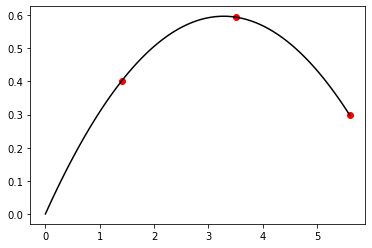

In [82]:
plt.scatter(X,Y,color='r')
plt.plot(x,y,color='k')

In [83]:
x = sym.Symbol('x')
f = Poly(x,X,Y)

In [84]:
f

0.400795493181974*(1.33333333333333 - 0.238095238095238*x)*(1.66666666666667 - 0.476190476190476*x) + 0.594128102489774*(2.66666666666667 - 0.476190476190476*x)*(0.476190476190476*x - 0.666666666666667) + 0.298027955239382*(0.238095238095238*x - 0.333333333333333)*(0.476190476190476*x - 1.66666666666667)

In [85]:
f = f = sym.expand(f)
f

-0.0554912422401579*x**2 + 0.363970234266202*x + 2.77555756156289e-17


$$ tan \Theta = 0.363970234266202$$



In [86]:
theta = np.arctan(0.363970234266202)
theta

0.3490658503988656

In [87]:
valor = np.degrees(theta)

In [88]:
angulo_redondeado = np.round(valor)
angulo_redondeado

20.0

$$ \frac{1}{2}* \frac{g}{(V0x)^2} = −0.0554912422401579$$

$$ *Entonces* $$

$$ V0x = \sqrt{\frac{1}{2}* \frac{g}{0.0554912422401579}} $$

In [89]:
g = 9.81

decimal = 0.0554912422401579

V0x = np.sqrt(g/(2*decimal))

V0x

9.401719335540246

$$ V0x = V0*cos\Theta $$

$$ *Entonces* $$

$$V0 = \frac{V0x}{cos\Theta} $$

In [90]:
V0 = (V0x/np.cos(theta))
V0


10.00510073993893

In [91]:
velocidad_redondeada = np.round(V0)
velocidad_redondeada

10.0

In [92]:
#Respuesta
print("La velocidad inicial de la bala es: ", velocidad_redondeada,"m/s." "Con un angulo de inclinación de:" , angulo_redondeado, "°")

La velocidad inicial de la bala es:  10.0 m/s.Con un angulo de inclinación de: 20.0 °
